# Actividad 2
En el siguiente apartado se va a realizar la parte 4 de la actividad 2

In [3]:
# Importar librerias
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# Crear clase para manejar imagenes
class Imagen:
    def __init__(self, name):
        self.name = name
        self.img = cv2.imread(name)
        self.img = cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB)

    def show(self):
        print('El tamaño de la imagen es:', self.img.shape)
        plt.imshow(self.img)
        plt.show()
    def grises(self):
        gris = cv2.cvtColor(self.img, cv2.COLOR_RGB2GRAY)
        plt.imshow(gris, cmap='gray')
        plt.show()
    def hsv(self):
        hsv = cv2.cvtColor(self.img, cv2.COLOR_RGB2HSV)
        plt.imshow(hsv)
        plt.show()
    def brillo_contraste(self, alpha, beta):
        alpha = 1.5  # Contraste
        beta = 50    # Brillo
        adjusted = cv2.convertScaleAbs(self.img, alpha=alpha, beta=beta)
        plt.imshow(adjusted)
        plt.title('Imagen con Brillo y Contraste Ajustados')
        plt.show()
    

El tamaño de la imagen es: (960, 1280, 3)


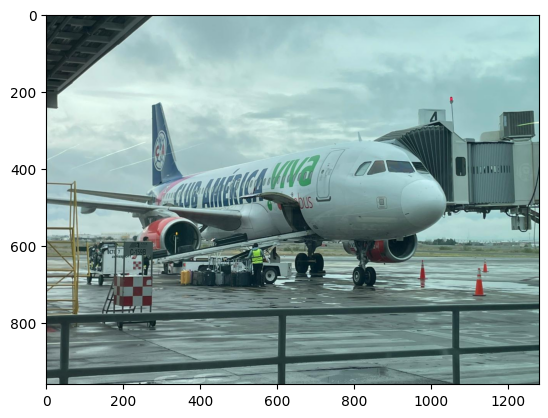

El tamaño de la imagen es: (900, 1600, 3)


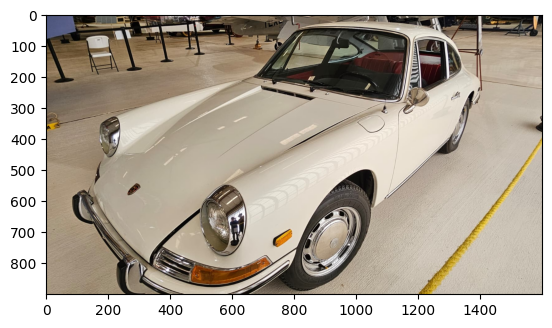

El tamaño de la imagen es: (900, 1600, 3)


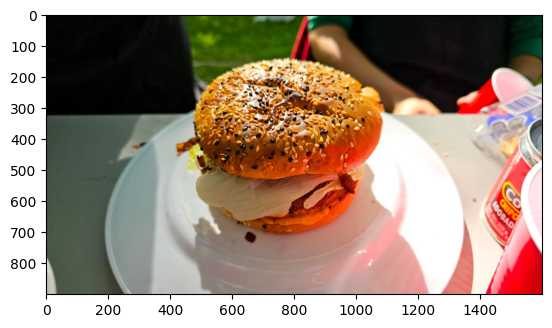

El tamaño de la imagen es: (1600, 1470, 3)


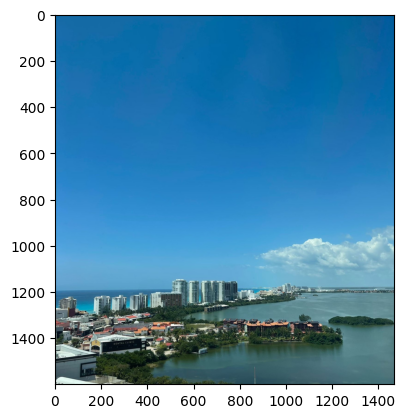

El tamaño de la imagen es: (1600, 900, 3)


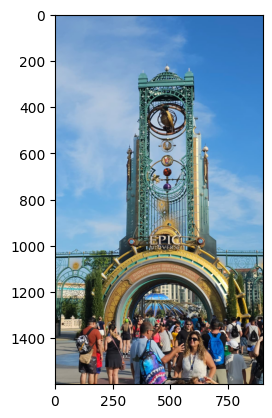

In [4]:
# Crear objetos de la clase Imagen y mostrarlas usando el metodo show    
avion = Imagen ('avion.jpg')
avion.show()
carro = Imagen ('carro.jpg')
carro.show()
hamburguesa = Imagen ('hamburguesa.jpg')
hamburguesa.show()
paisaje = Imagen ('paisaje.jpg')
paisaje.show()
universal = Imagen ('universal.jpg')
universal.show()

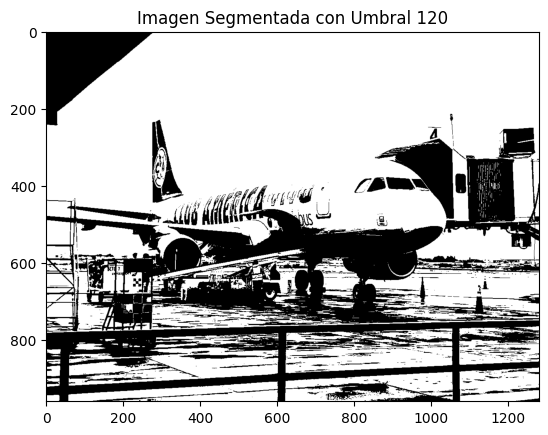

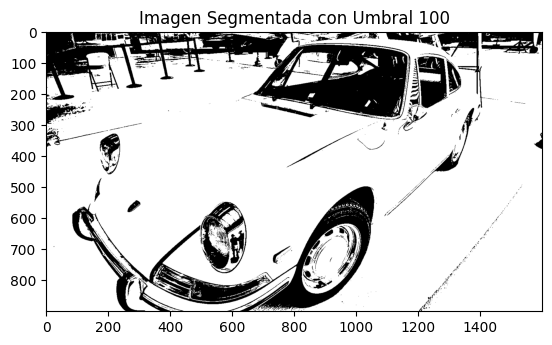

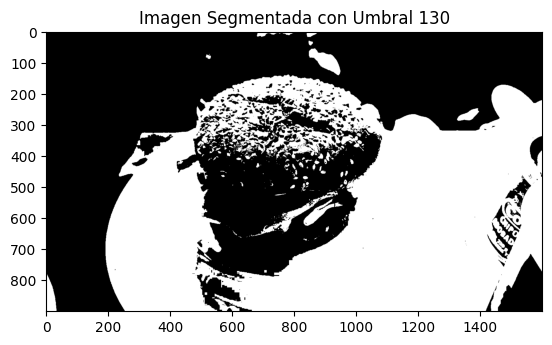

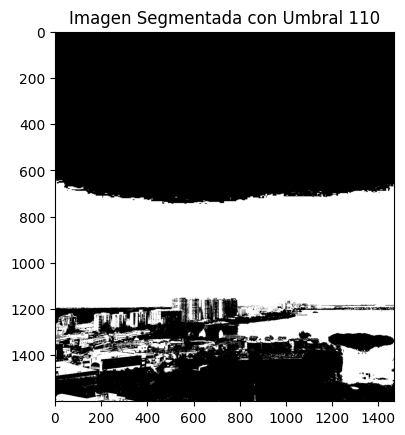

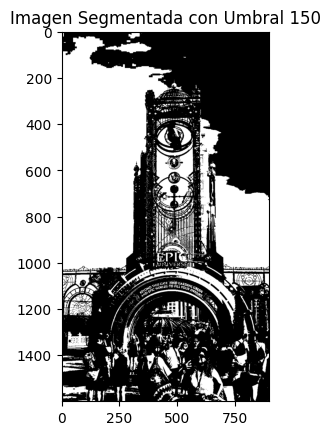

In [6]:
#Segmentar imagenes mediante umbrado
def segmentar_umbral(imagen, umbral):
    gris = cv2.cvtColor(imagen.img, cv2.COLOR_RGB2GRAY)
    _, binary = cv2.threshold(gris, umbral, 255, cv2.THRESH_BINARY)
    plt.imshow(binary, cmap='gray')
    plt.title(f'Imagen Segmentada con Umbral {umbral}')
    plt.show()
segmentar_umbral(avion, 120)
segmentar_umbral(carro, 100)
segmentar_umbral(hamburguesa, 130)
segmentar_umbral(paisaje, 110)
segmentar_umbral(universal, 150)



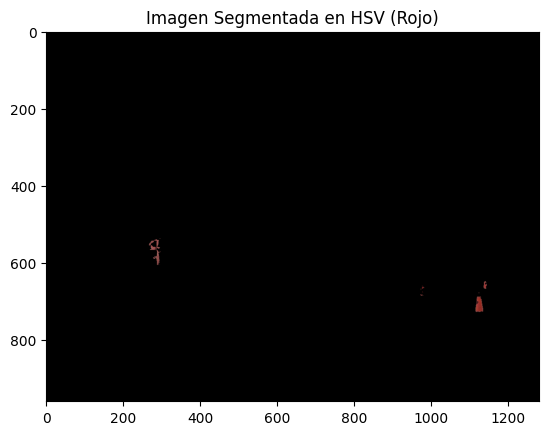

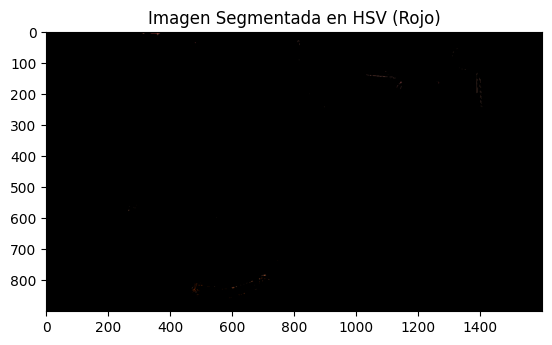

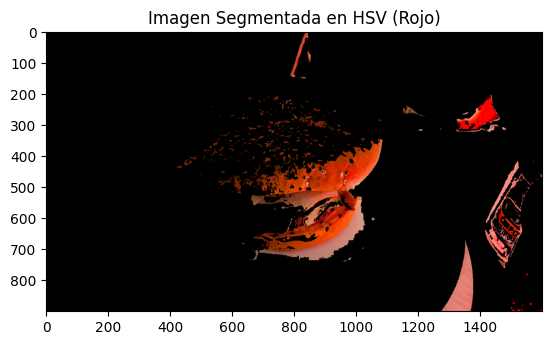

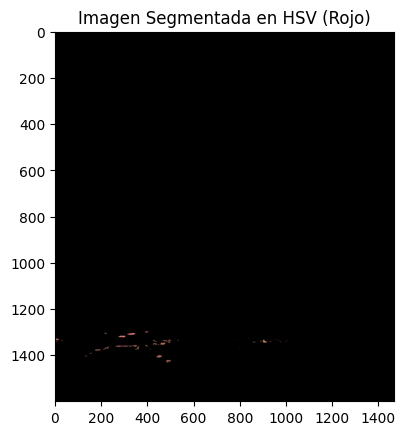

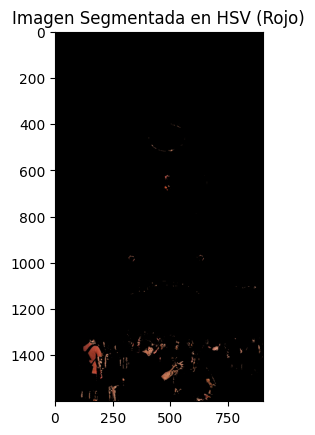

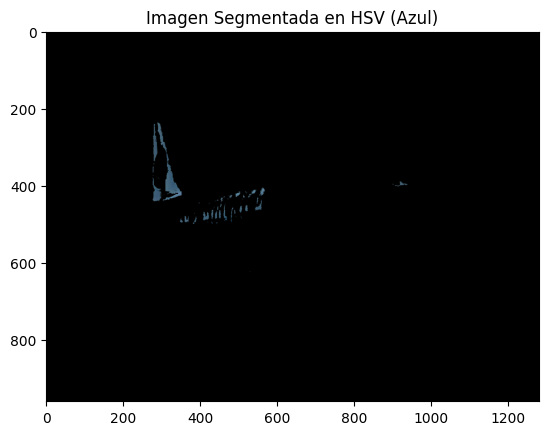

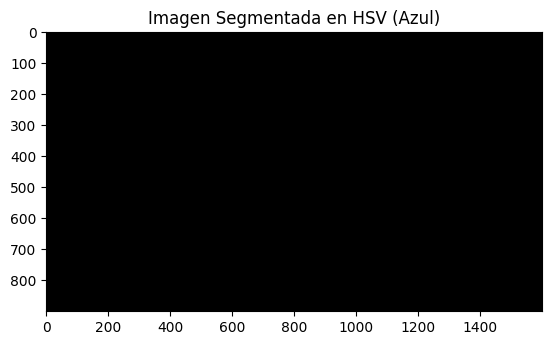

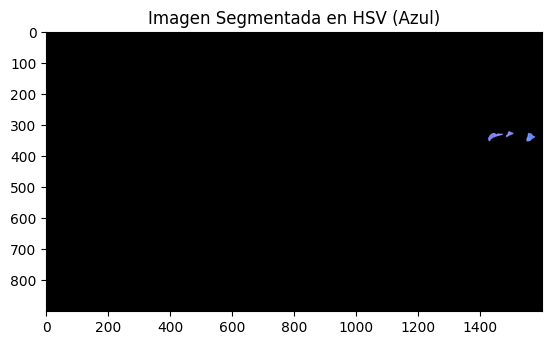

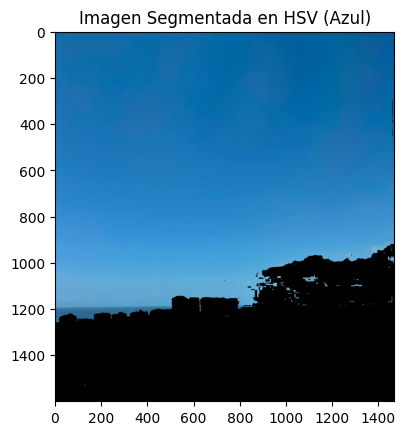

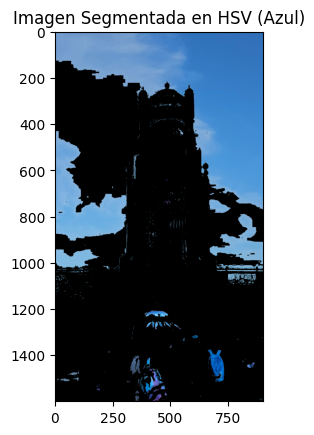

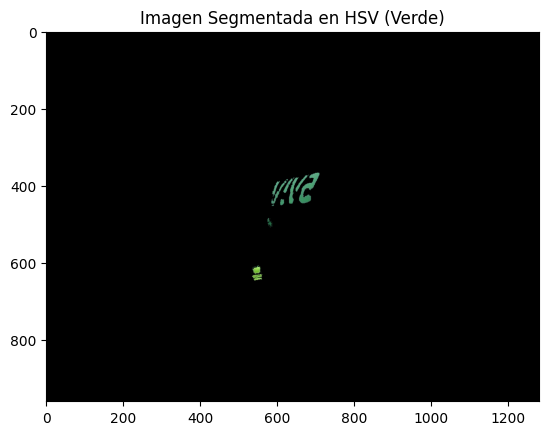

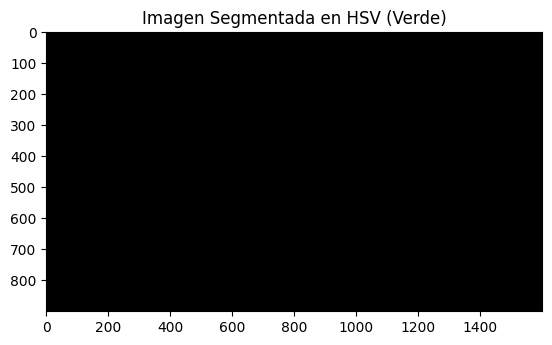

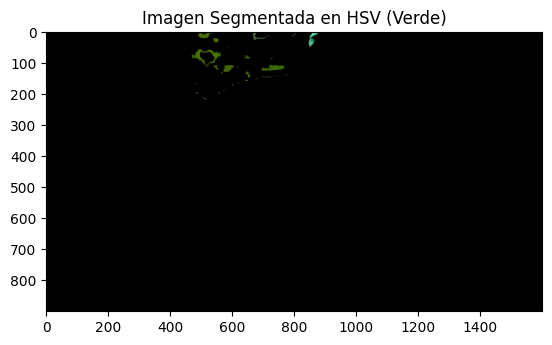

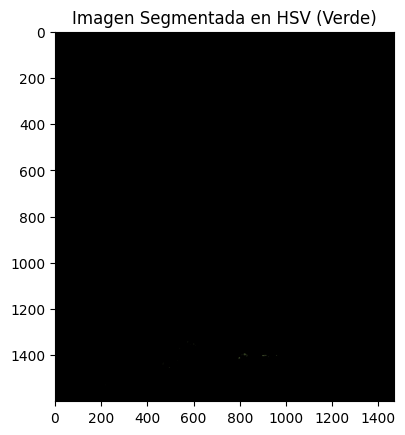

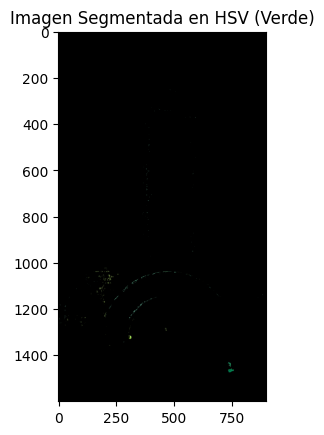

In [8]:
#Segmentar imagenes mediante segmentacion por color HSV
def segmentar_hsv(imagen, lower_bound, upper_bound, color_name=""):
    hsv = cv2.cvtColor(imagen.img, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(hsv, lower_bound, upper_bound)
    result = cv2.bitwise_and(imagen.img, imagen.img, mask=mask)
    plt.imshow(result)
    plt.title(f'Imagen Segmentada en HSV ({color_name})')
    plt.show()

# Definir rangos de color para segmentacion (color rojo)
lower_red = np.array([0, 100, 100])
upper_red = np.array([10, 255, 255])
segmentar_hsv(avion, lower_red, upper_red, "Rojo")
segmentar_hsv(carro, lower_red, upper_red, "Rojo")
segmentar_hsv(hamburguesa, lower_red, upper_red, "Rojo")
segmentar_hsv(paisaje, lower_red, upper_red, "Rojo")
segmentar_hsv(universal, lower_red, upper_red, "Rojo")

# Definir rangos de color para segmentacion (color azul)
lower_blue = np.array([100, 100, 100])
upper_blue = np.array([140, 255, 255])
segmentar_hsv(avion, lower_blue, upper_blue, "Azul")
segmentar_hsv(carro, lower_blue, upper_blue, "Azul")
segmentar_hsv(hamburguesa, lower_blue, upper_blue, "Azul")
segmentar_hsv(paisaje, lower_blue, upper_blue, "Azul")
segmentar_hsv(universal, lower_blue, upper_blue, "Azul")

# Definir rangos de color para segmentacion (color verde)
lower_green = np.array([40, 100, 100])
upper_green = np.array([80, 255, 255])
segmentar_hsv(avion, lower_green, upper_green, "Verde")
segmentar_hsv(carro, lower_green, upper_green, "Verde")
segmentar_hsv(hamburguesa, lower_green, upper_green, "Verde")
segmentar_hsv(paisaje, lower_green, upper_green, "Verde")
segmentar_hsv(universal, lower_green, upper_green, "Verde")

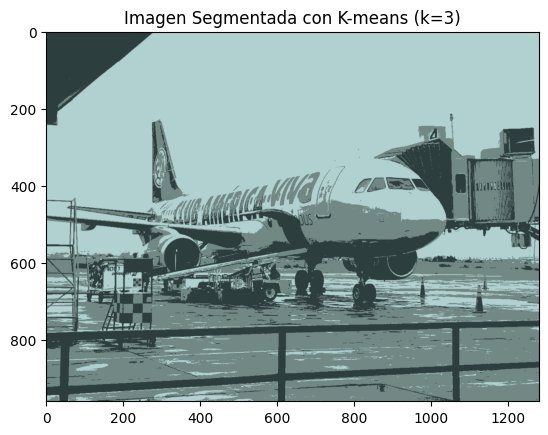

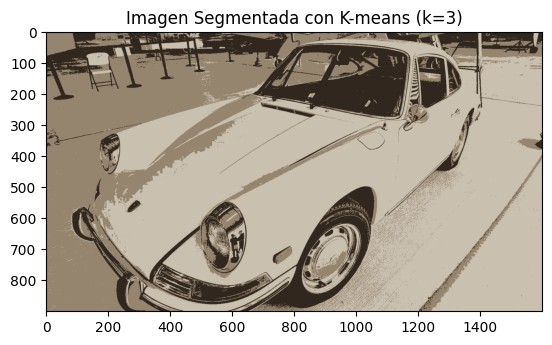

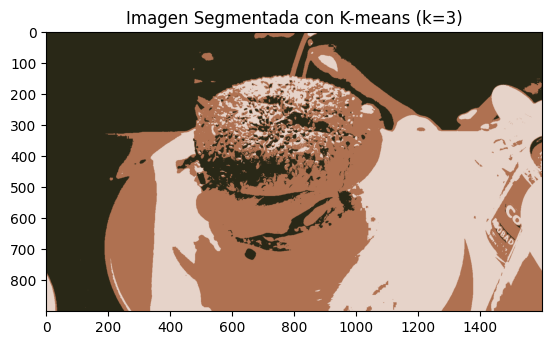

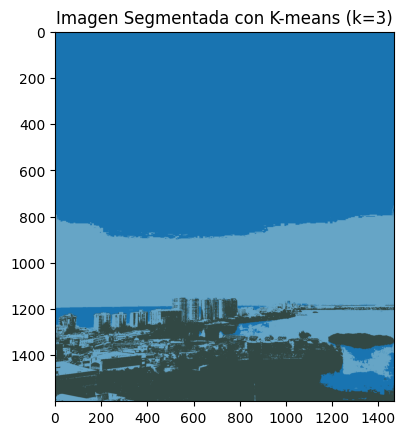

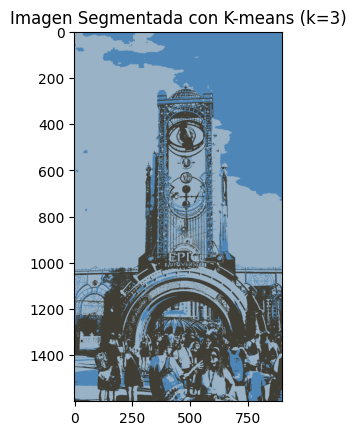

In [9]:
#Segmentar las imagenes mediante segmentacion K-means clustering
def segmentar_kmeans(imagen, k):
    Z = imagen.img.reshape((-1, 3))
    Z = np.float32(Z)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(Z, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    segmented_data = centers[labels.flatten()]
    segmented_image = segmented_data.reshape((imagen.img.shape))
    plt.imshow(segmented_image)
    plt.title(f'Imagen Segmentada con K-means (k={k})')
    plt.show()
segmentar_kmeans(avion, 3)
segmentar_kmeans(carro, 3)
segmentar_kmeans(hamburguesa, 3)
segmentar_kmeans(paisaje, 3)
segmentar_kmeans(universal, 3)

